In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/Dataset .csv")
df.sample()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
5668,312620,Brown Town Bakers,1,New Delhi,"RZ-20-21, Old Roshan Pura, Parawat Road, Near ...",Najafgarh,"Najafgarh, New Delhi",76.984727,28.607614,"Desserts, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1


In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [7]:
df.shape

(9551, 21)

In [8]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df['Cuisines'].isna().sum()

9

In [10]:
df['Cuisines'].fillna('Unknown', inplace=True)

In [11]:
df['Cuisines'].isna().sum()

0

In [12]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
# cat col
cat_col = ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
                       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
                       'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']

for col in cat_col:
    df[col] = df[col].astype('category')

In [14]:
df.dtypes

Restaurant ID              int64
Restaurant Name         category
Country Code               int64
City                    category
Address                 category
Locality                category
Locality Verbose        category
Longitude                float64
Latitude                 float64
Cuisines                category
Average Cost for two       int64
Currency                category
Has Table booking       category
Has Online delivery     category
Is delivering now       category
Switch to order menu    category
Price range                int64
Aggregate rating         float64
Rating color            category
Rating text             category
Votes                      int64
dtype: object

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

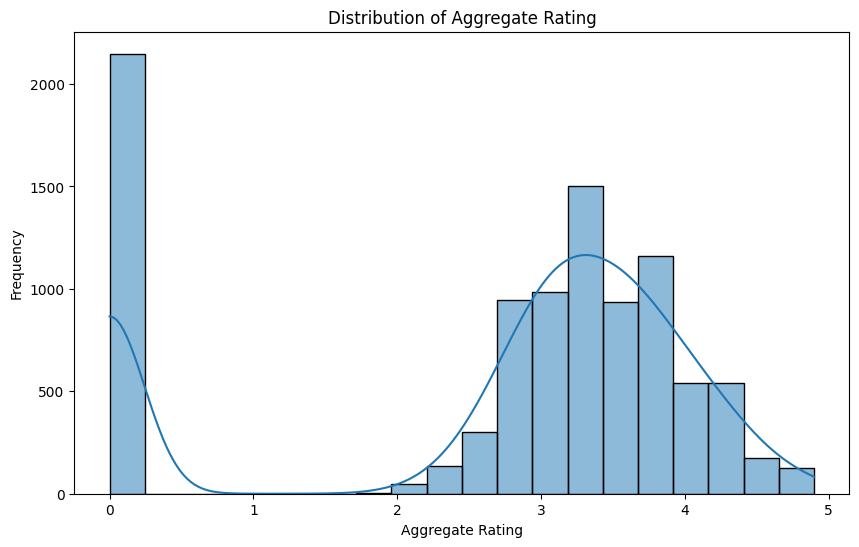

In [16]:
# Plot this distribution of tgt col
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Check for class imbalance in the target variable 'Aggregate rating'
rating_counts = df['Aggregate rating'].value_counts().sort_index()
print(rating_counts)

Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64


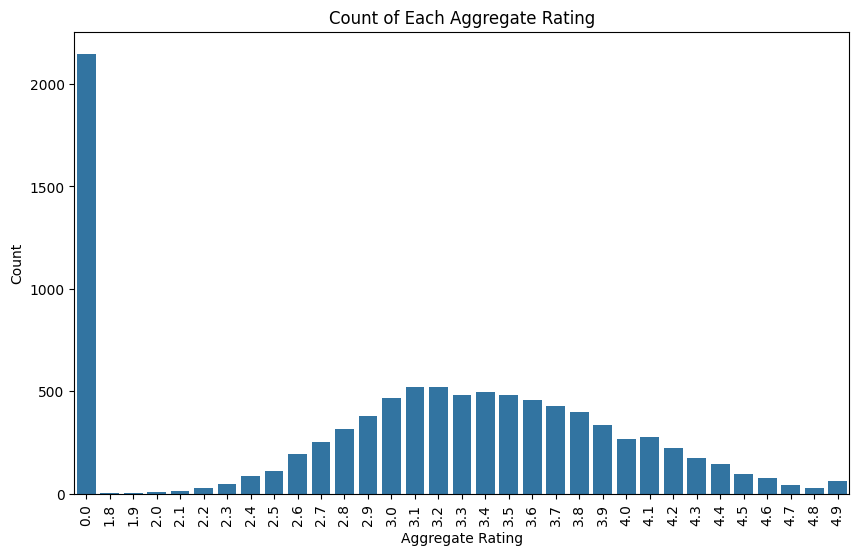

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Aggregate rating', data=df, order=rating_counts.index)
plt.title('Count of Each Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Task-2

In [19]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
statistics = df[num_col].describe()
print(statistics)

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

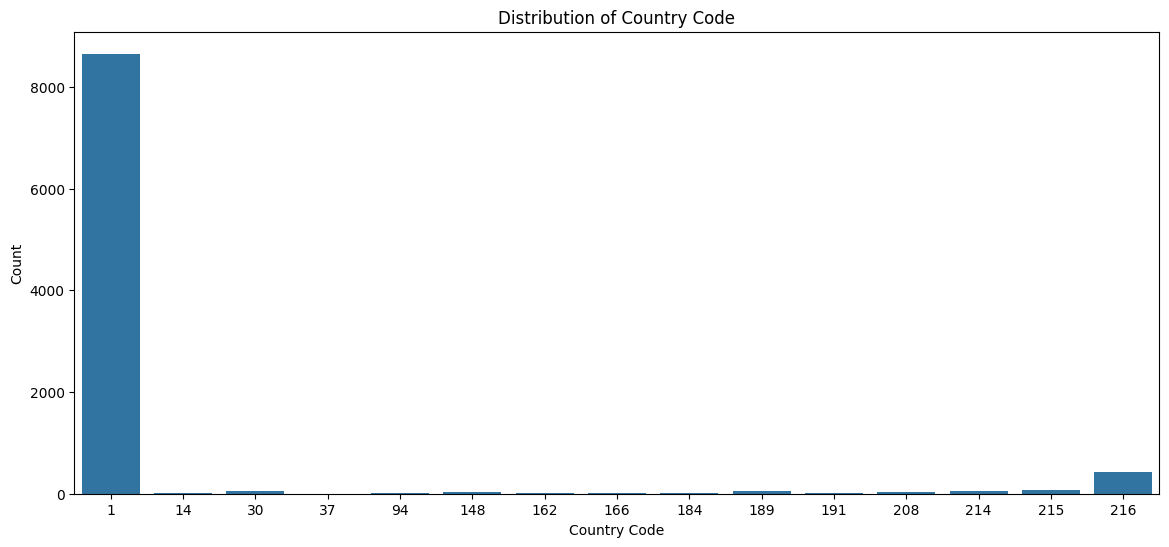

In [20]:
# Distribution of 'Country Code'
plt.figure(figsize=(14, 6))
sns.countplot(x='Country Code', data=df)
plt.title('Distribution of Country Code')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.show()

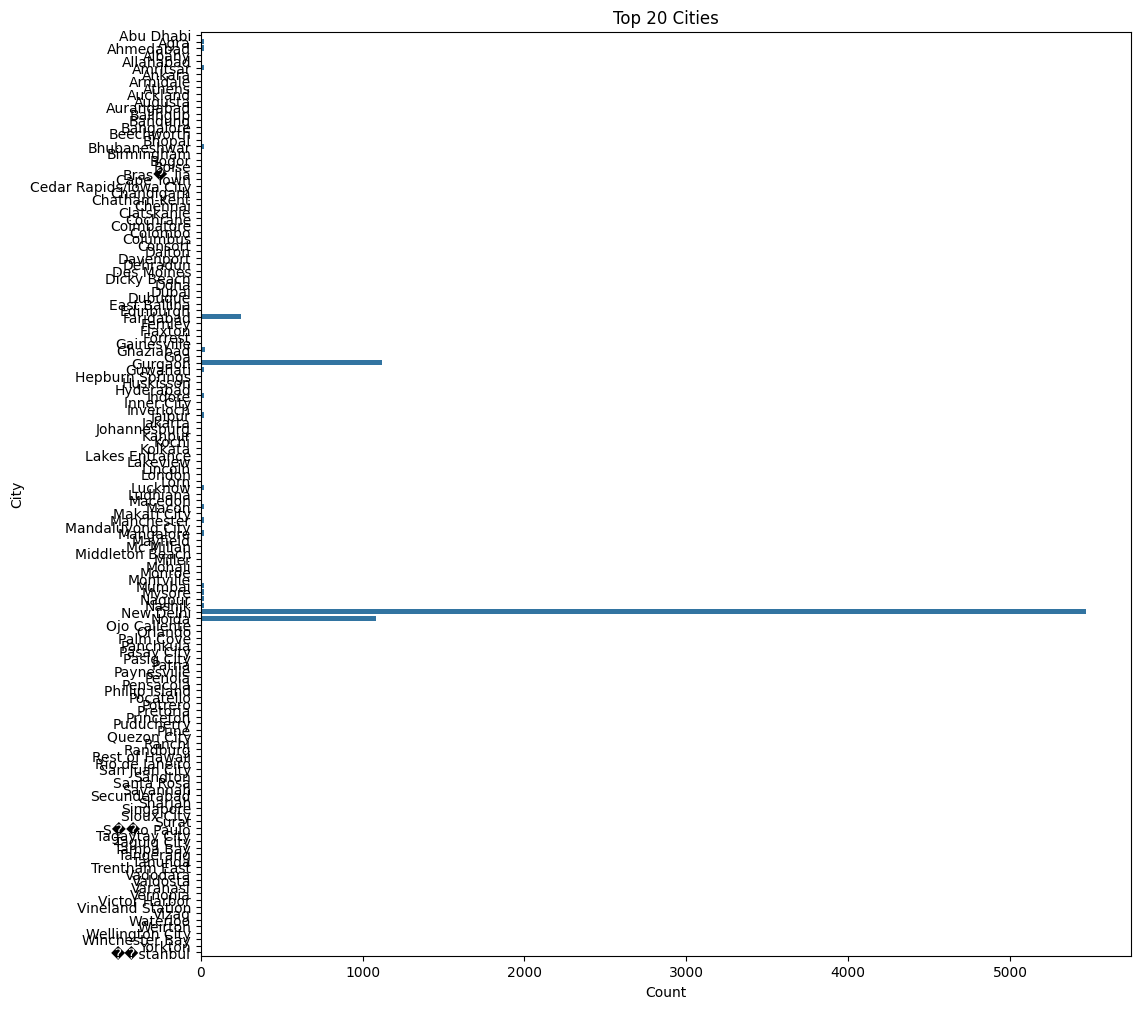

In [21]:
# Distribution of 'City'
plt.figure(figsize=(12, 12))
city_counts = df['City'].value_counts().nlargest(20)  # Show top 20 cities for better visualization
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title('Top 20 Cities')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

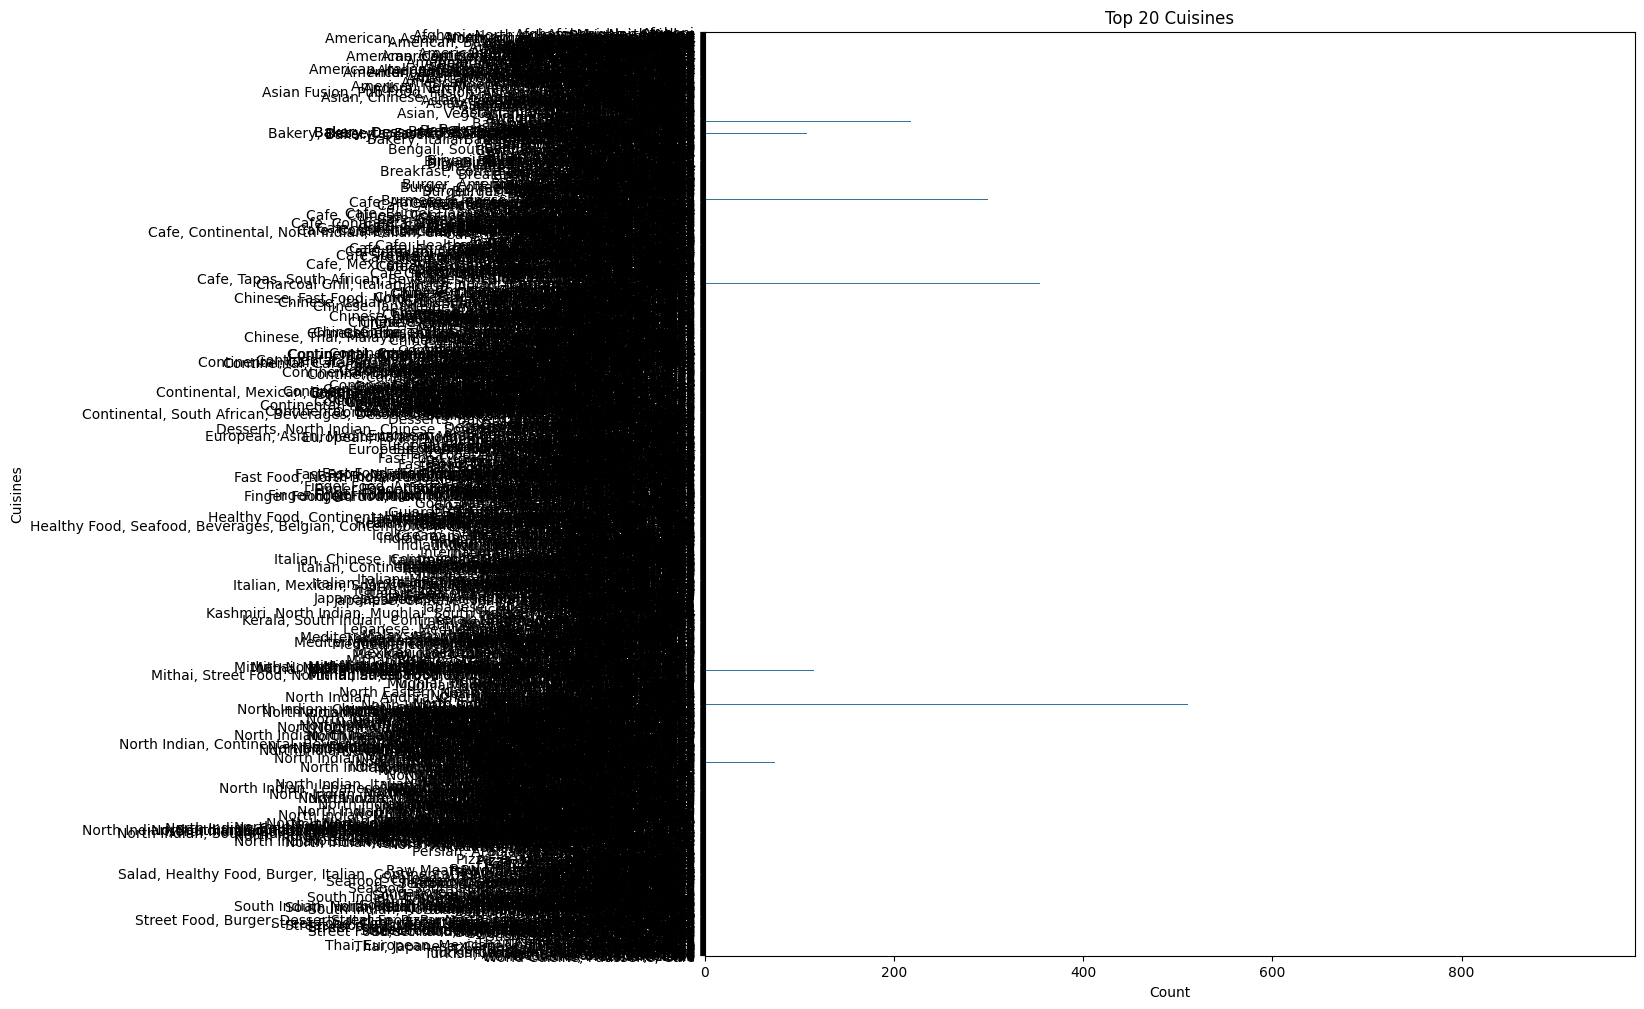

In [22]:
# Distribution of 'Cuisines'
plt.figure(figsize=(12, 12))
cuisine_counts = df['Cuisines'].value_counts().nlargest(20)  # Show top 20 cuisines for better visualization
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index)
plt.title('Top 20 Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.show()

In [23]:
# Top 10 cuisines
top_cuisines = df['Cuisines'].value_counts().head(10)
print("Top 10 Cuisines:\n", top_cuisines)

Top 10 Cuisines:
 Cuisines
North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [24]:
# Top 10 cities
top_cities = df['City'].value_counts().head(10)
print("Top 10 Cities:\n", top_cities)

Top 10 Cities:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Amritsar          21
Ahmedabad         21
Guwahati          21
Name: count, dtype: int64


Task-3

In [25]:
pip install geopandas folium

In [26]:
import folium
import geopandas as gpd
from folium.plugins import MarkerCluster

In [27]:
map = folium.Map(location=[20, 0], zoom_start=2)

In [28]:
marker_cluster = MarkerCluster().add_to(map)

for idx, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=f"{row['Restaurant Name']} ({row['Aggregate rating']})").add_to(marker_cluster)


In [29]:
map.save("restaurants_map.html")

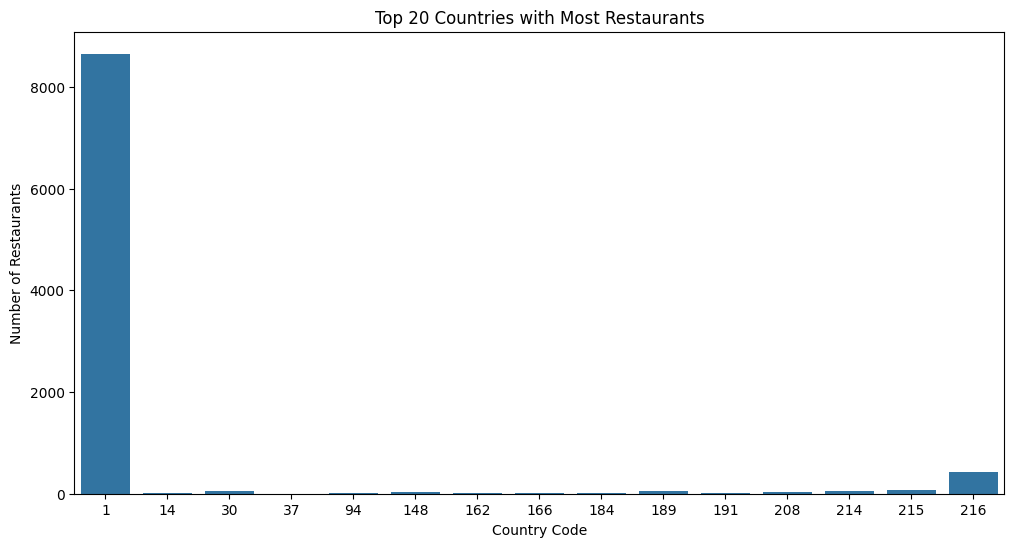

In [30]:
# Distribution across countries
plt.figure(figsize=(12, 6))
country_counts = df['Country Code'].value_counts().head(20)
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 20 Countries with Most Restaurants')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.show()

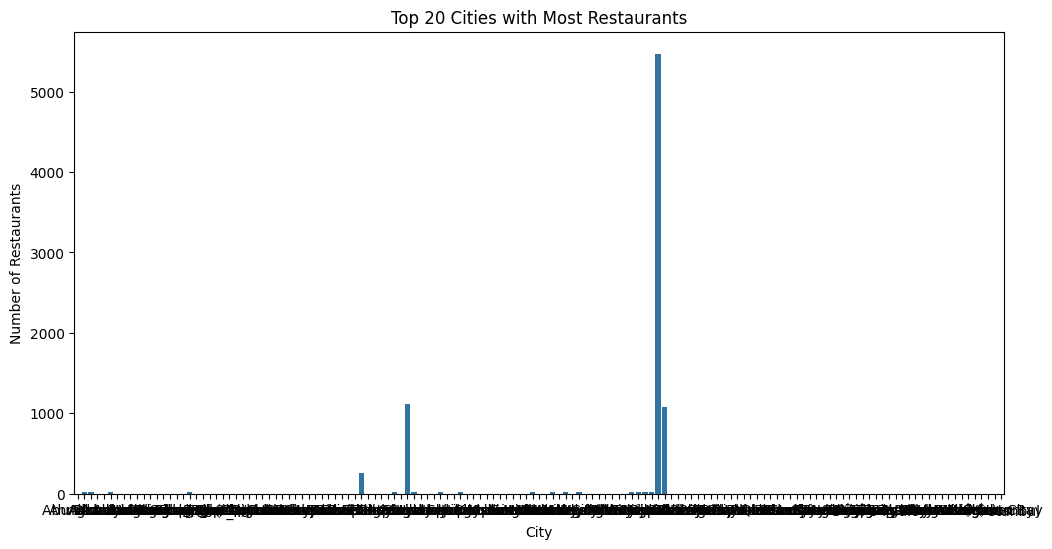

In [31]:
# Distribution across cities
plt.figure(figsize=(12, 6))
city_counts = df['City'].value_counts().head(20)
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Top 20 Cities with Most Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

In [32]:
map_ratings = folium.Map(location=[20, 0], zoom_start=2)

In [33]:
# Define a function to get the color based on rating
def get_color(rating):
    if rating < 2:
        return 'red'
    elif rating < 4:
        return 'orange'
    else:
        return 'green'

for idx, row in df.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=5,
                        color=get_color(row['Aggregate rating']),
                        fill=True,
                        fill_color=get_color(row['Aggregate rating']),
                        popup=f"{row['Restaurant Name']} ({row['Aggregate rating']})").add_to(map_ratings)

# Save the map to an HTML file
map_ratings.save("restaurants_ratings_map.html")

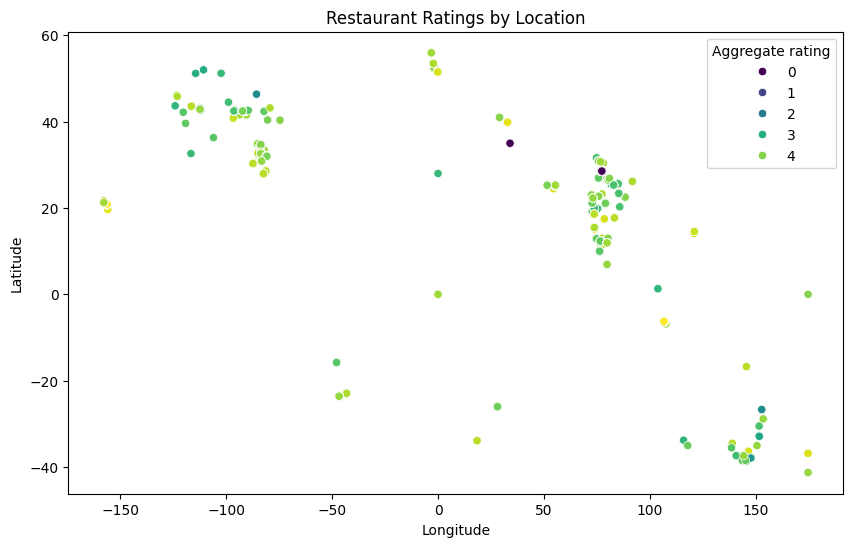

In [34]:
# Check corr for lat and long
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Aggregate rating', data=df, palette='viridis')
plt.title('Restaurant Ratings by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [35]:
# Calculate cirr matrix for num features including lat, long, and rating
corr_mat = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print(corr_mat)

                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


Level-2

In [36]:
table_booking_perc = (df['Has Table booking'].value_counts(normalize=True) * 100).get('Yes', 0)
online_delivery_perc = (df['Has Online delivery'].value_counts(normalize=True) * 100).get('Yes', 0)

In [37]:
print(f"Perc of restaurants that offer table booking: {table_booking_perc:.2f}%")
print(f"Perc of restaurants that offer online delivery: {online_delivery_perc:.2f}%")

Perc of restaurants that offer table booking: 12.12%
Perc of restaurants that offer online delivery: 25.66%


In [38]:
avg_rating_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()

In [39]:
print("Avg rating of restaurants with table booking:")
print(avg_rating_table_booking)

Avg rating of restaurants with table booking:
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


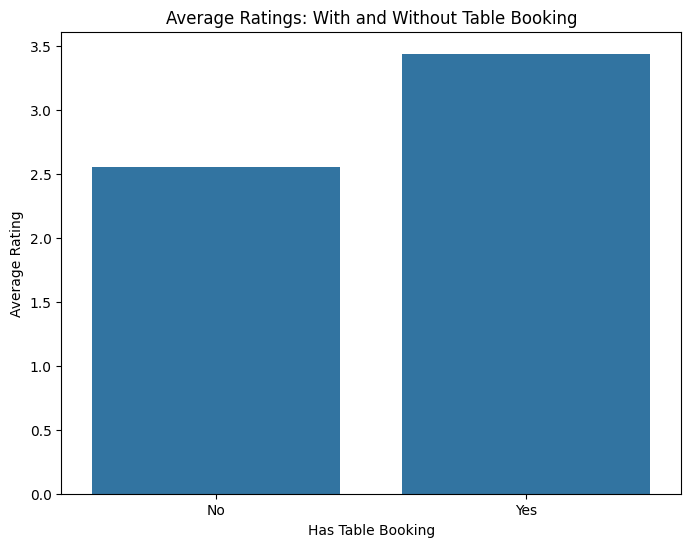

In [40]:
# comparision
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_rating_table_booking.index, y=avg_rating_table_booking.values)
plt.title('Average Ratings: With and Without Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Rating')
plt.show()

In [41]:
online_delivery_price_range = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100

<Figure size 1000x600 with 0 Axes>

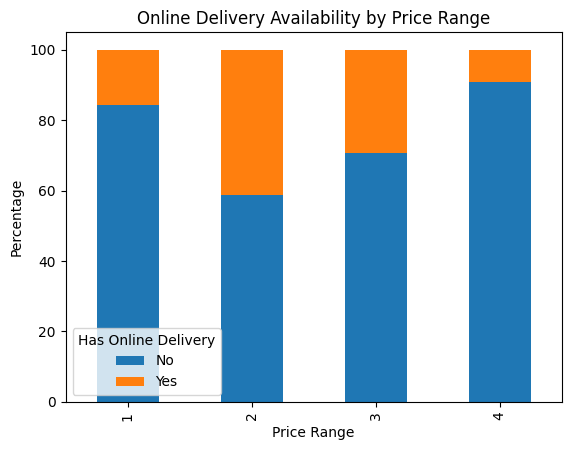

In [42]:
# comparison
plt.figure(figsize=(10, 6))
online_delivery_price_range.plot(kind='bar', stacked=True)
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.legend(title='Has Online Delivery')
plt.show()

Task-2


In [43]:
# Find the common price
most_common_price_range = df['Price range'].mode()[0]
print(f"The most common price range among all the restaurants is: {most_common_price_range}")

The most common price range among all the restaurants is: 1


In [44]:
# Avg rat
avg_rating_per_price_range = df.groupby('Price range')['Aggregate rating'].mean()
print("Avg rating for each price range:")
print(avg_rating_per_price_range)

Avg rating for each price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


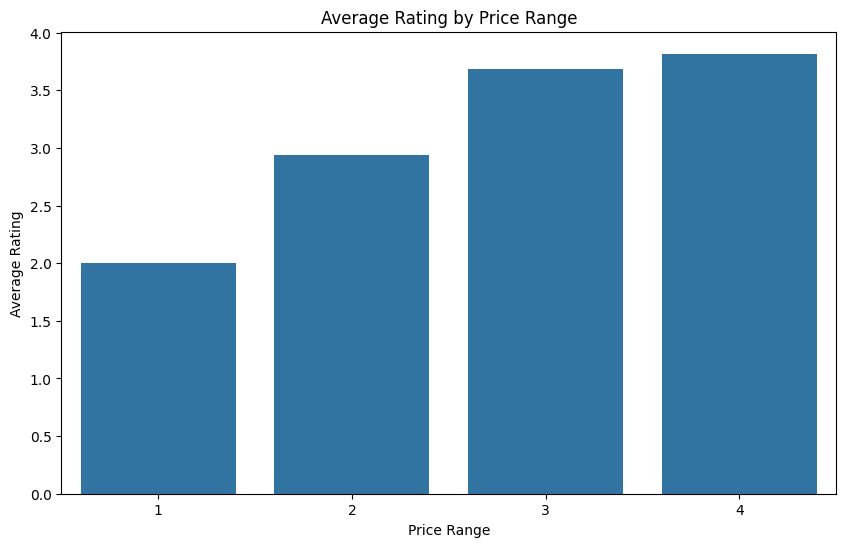

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_per_price_range.index, y=avg_rating_per_price_range.values)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

In [46]:
highest_avg_rating_price_range = avg_rating_per_price_range.idxmax()
highest_avg_rating_color = df[df['Price range'] == highest_avg_rating_price_range]['Rating color'].mode()[0]

In [47]:
print(f"The price range with the highest average rating is: {highest_avg_rating_price_range}")
print(f"The color representing the highest average rating among different price ranges is: {highest_avg_rating_color}")

The price range with the highest average rating is: 4
The color representing the highest average rating among different price ranges is: Yellow


<ipython-input-48-cb9ab6761168>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Highest Avg Rating'], y=[avg_rating_per_price_range.max()], palette=[highest_avg_rating_color])


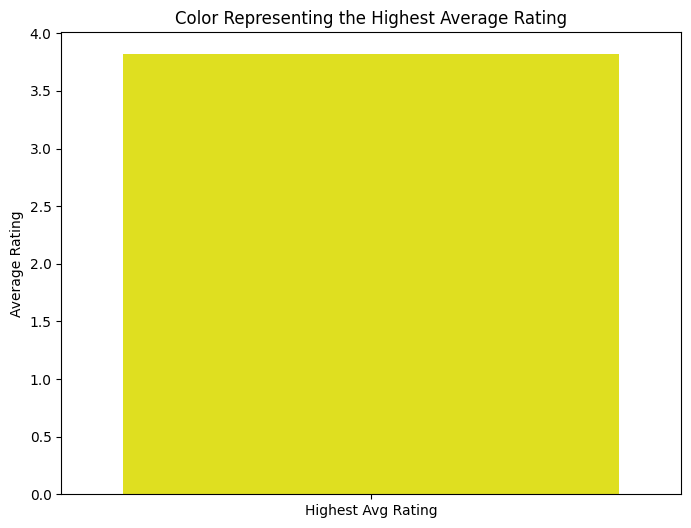

In [48]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Highest Avg Rating'], y=[avg_rating_per_price_range.max()], palette=[highest_avg_rating_color])
plt.title('Color Representing the Highest Average Rating')
plt.ylabel('Average Rating')
plt.show()

In [49]:
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)

In [50]:
# Encode
df['Has Table Booking Encoded'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online Delivery Encoded'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

In [51]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking Encoded,Has Online Delivery Encoded
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0


In [52]:
df.to_csv("df1.csv", index=False)

In [53]:
df1=pd.read_csv("/content/df1.csv")
df1.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking Encoded,Has Online Delivery Encoded
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0


Level 3, Task-1

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
X = df1.drop(['Aggregate rating', 'Rating color', 'Rating text'], axis=1)
y = df1['Aggregate rating']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [58]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [59]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [60]:
linear_reg_model = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', LinearRegression())])

random_forest_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', RandomForestRegressor(random_state=42))])

decision_tree_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', DecisionTreeRegressor(random_state=42))])

In [61]:
# Train models
linear_reg_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Votes',
       'Restaurant Name Length', 'Address Length', 'Has Table Booking Encoded',
       'Has Online Delivery Encoded'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu'],
      dtype='object'))])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [62]:
# Predictions
y_pred_linear_reg = linear_reg_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)

In [63]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Model Evaluation:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}\n")

In [64]:
evaluate_model(y_test, y_pred_linear_reg, "Linear Regression")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 1.13
R-squared (R2): 0.50

Random Forest Model Evaluation:
Mean Squared Error (MSE): 0.07
R-squared (R2): 0.97

Decision Tree Model Evaluation:
Mean Squared Error (MSE): 0.12
R-squared (R2): 0.95



Level 3, Task-2

In [65]:
df1_exploded = df1.assign(Cuisines=df['Cuisines'].str.split(', ')).explode('Cuisines')

In [66]:
cuisine_rating = df1_exploded.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

print("Average rating for each cuisine:")
print(cuisine_rating)

Average rating for each cuisine:
Cuisines
Sunda             4.900000
B�_rek            4.700000
Taiwanese         4.650000
Ramen             4.500000
Dim Sum           4.466667
                    ...   
Moroccan          1.620000
Awadhi            1.572727
Armenian          1.300000
Cuisine Varies    0.000000
Mineira           0.000000
Name: Aggregate rating, Length: 146, dtype: float64


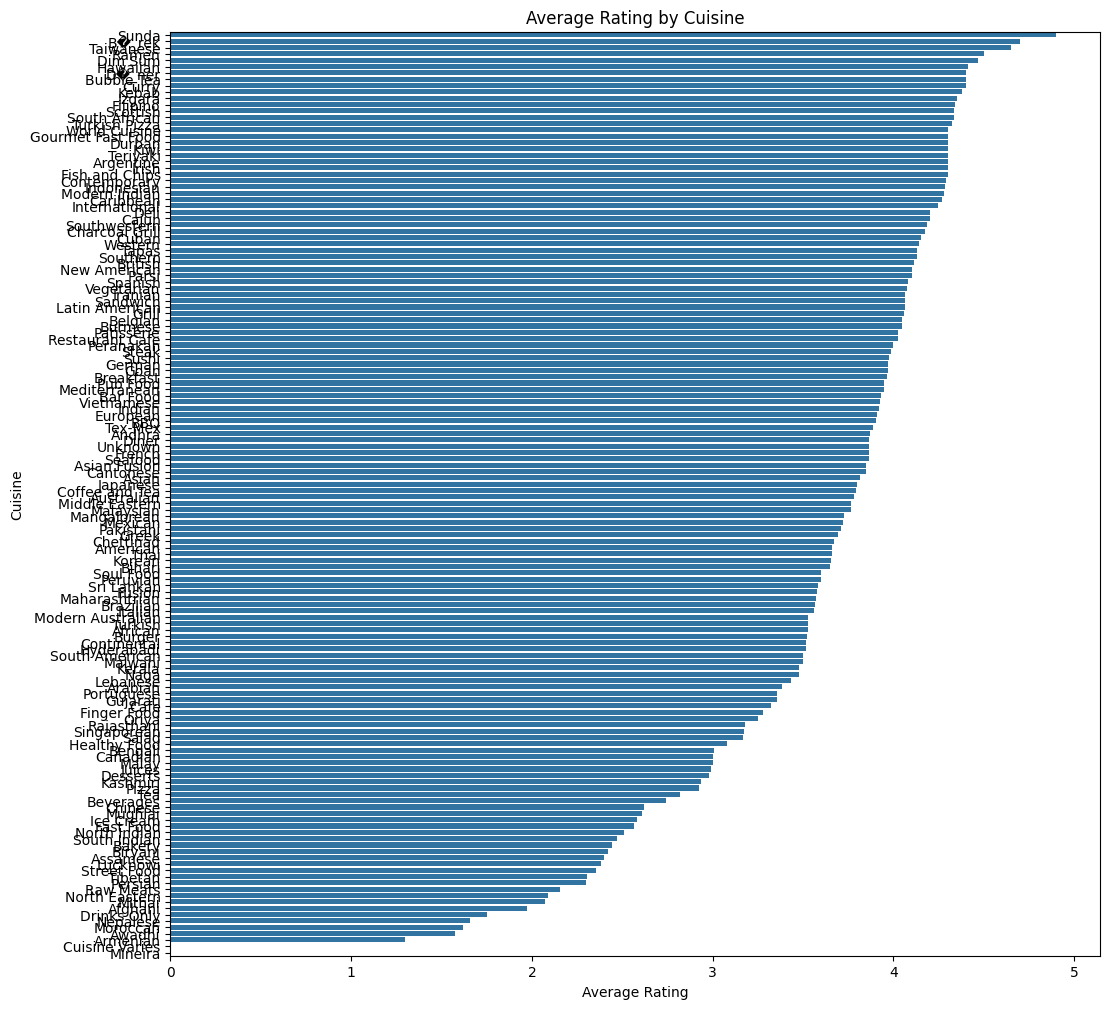

In [67]:
plt.figure(figsize=(12, 12))
sns.barplot(x=cuisine_rating.values, y=cuisine_rating.index)
plt.title('Average Rating by Cuisine')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

In [68]:
cuisine_votes = df1_exploded.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

print("Total votes for each cuisine:")
print(cuisine_votes)

Total votes for each cuisine:
Cuisines
North Indian      595981
Chinese           364351
Italian           329265
Continental       288255
Fast Food         184058
                   ...  
Malay                 25
Canadian               6
Peruvian               5
Cuisine Varies         2
Mineira                2
Name: Votes, Length: 146, dtype: int64


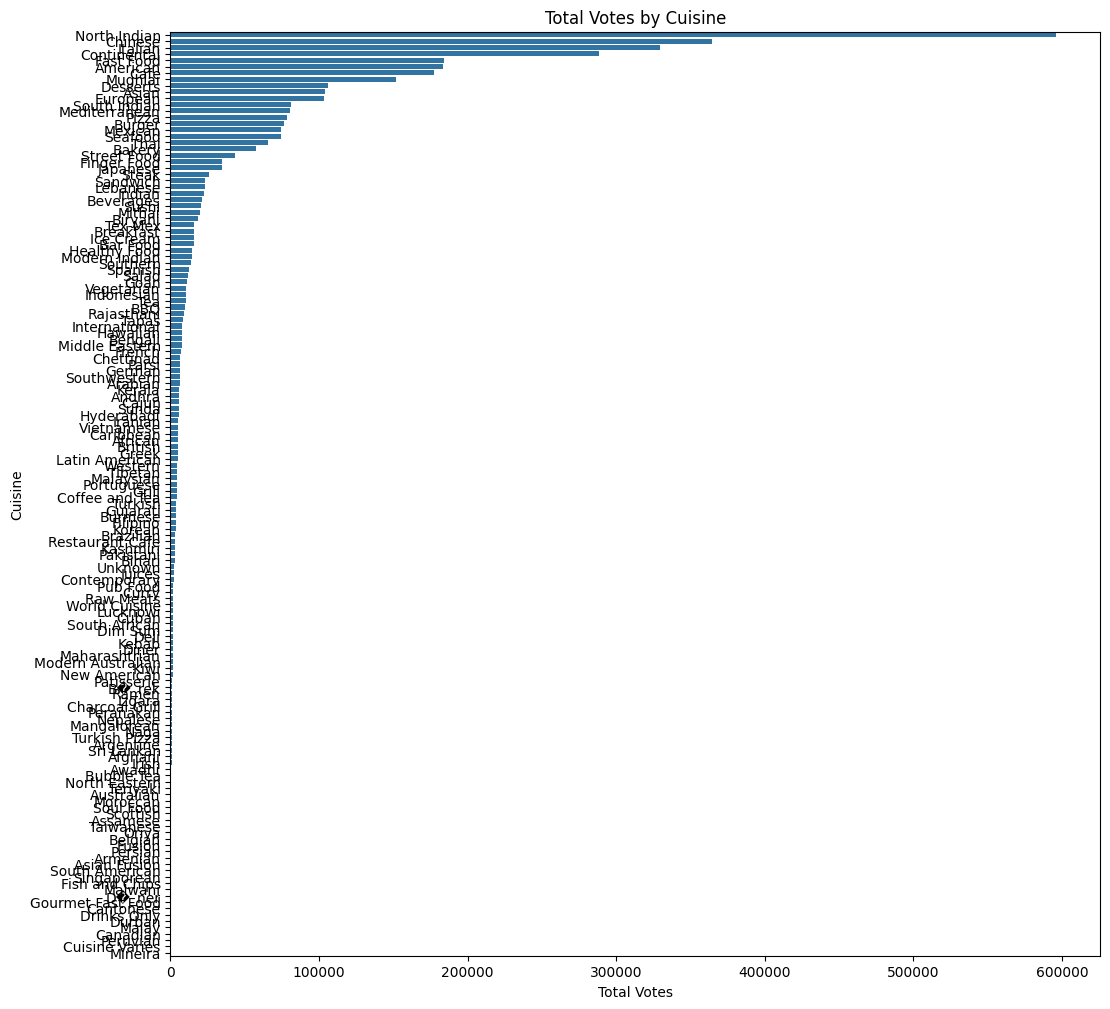

In [69]:
plt.figure(figsize=(12, 12))
sns.barplot(x=cuisine_votes.values, y=cuisine_votes.index)
plt.title('Total Votes by Cuisine')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.show()

In [70]:
# Merge
cuisine_analysis = pd.DataFrame({'Avg Rating': cuisine_rating, 'Total Votes': cuisine_votes})

In [71]:
cuisine_analysis.columns = cuisine_analysis.columns.str.strip()

In [72]:
print("Cuisine analysis with avg rating and total votes:")
print(cuisine_analysis)

Cuisine analysis with avg rating and total votes:
               Avg Rating  Total Votes
Cuisines                              
Afghani          1.971429          811
African          3.525000         5020
American         3.661538       183117
Andhra           3.870000         5946
Arabian          3.385714         6150
...                   ...          ...
Unknown          3.866667         2726
Vegetarian       4.073913        10714
Vietnamese       3.923810         5120
Western          4.140000         4749
World Cuisine    4.300000         1905

[146 rows x 2 columns]


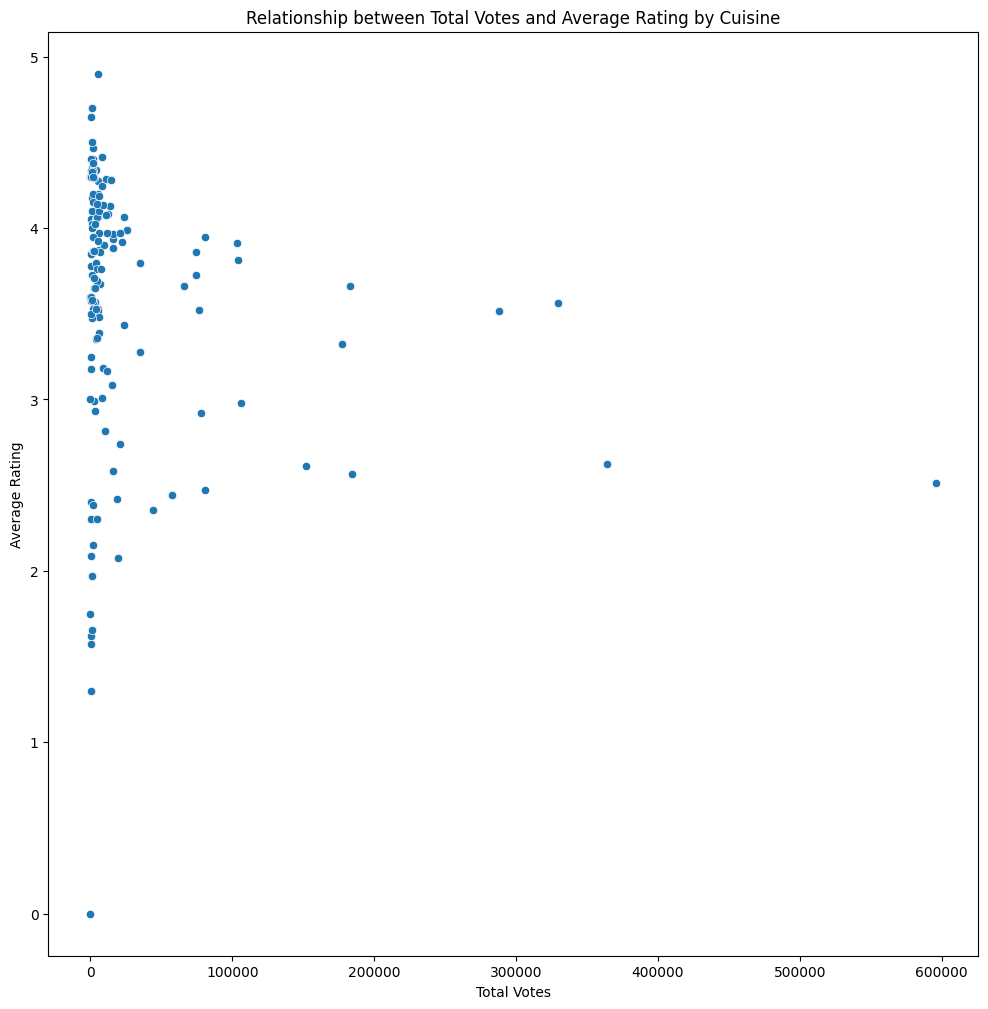

In [73]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x='Total Votes', y='Avg Rating', data=cuisine_analysis)
plt.title('Relationship between Total Votes and Average Rating by Cuisine')
plt.xlabel('Total Votes')
plt.ylabel('Average Rating')
plt.show()

Level-3 Task-3

In [74]:
sns.set(style="whitegrid")

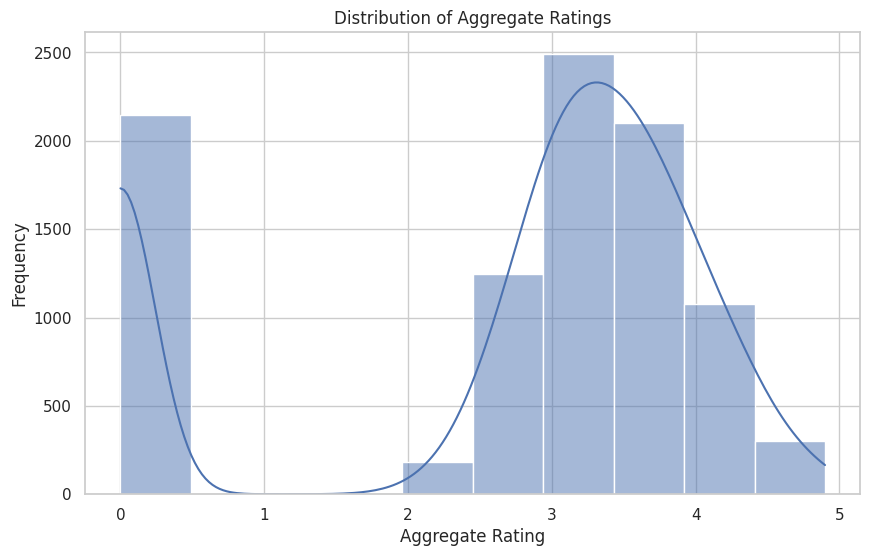

In [75]:
# Distribution of rate
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-76-8d06aa1f0be6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")


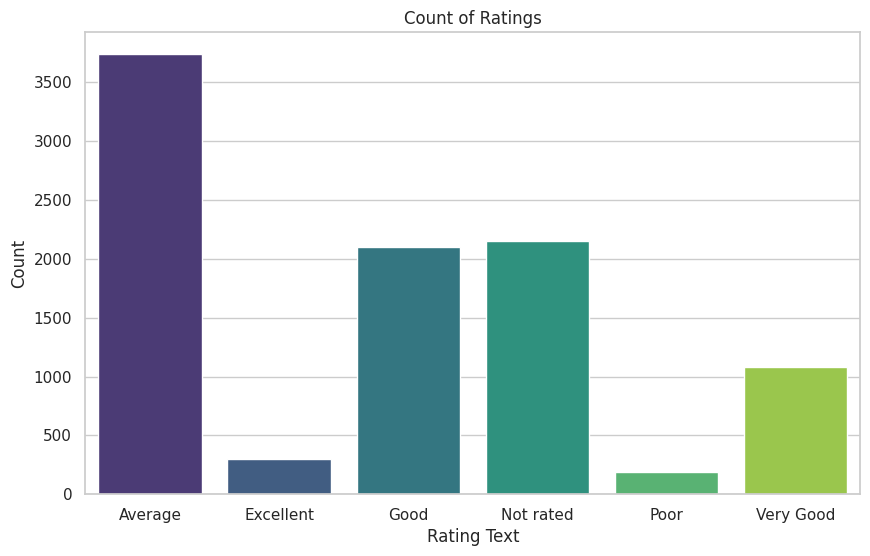

In [76]:
# distribution of rat3 count
rating_counts = df['Rating text'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")
plt.title('Count of Ratings')
plt.xlabel('Rating Text')
plt.ylabel('Count')
plt.show()

In [77]:
# Avg rating by cuisine
df_exploded = df.assign(Cuisines=df['Cuisines'].str.split(', ')).explode('Cuisines')
avg_rating_cuisine = df_exploded.groupby('Cuisines')['Aggregate rating'].mean().sort_values()

<ipython-input-78-90ae684ee3d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index, palette="coolwarm")


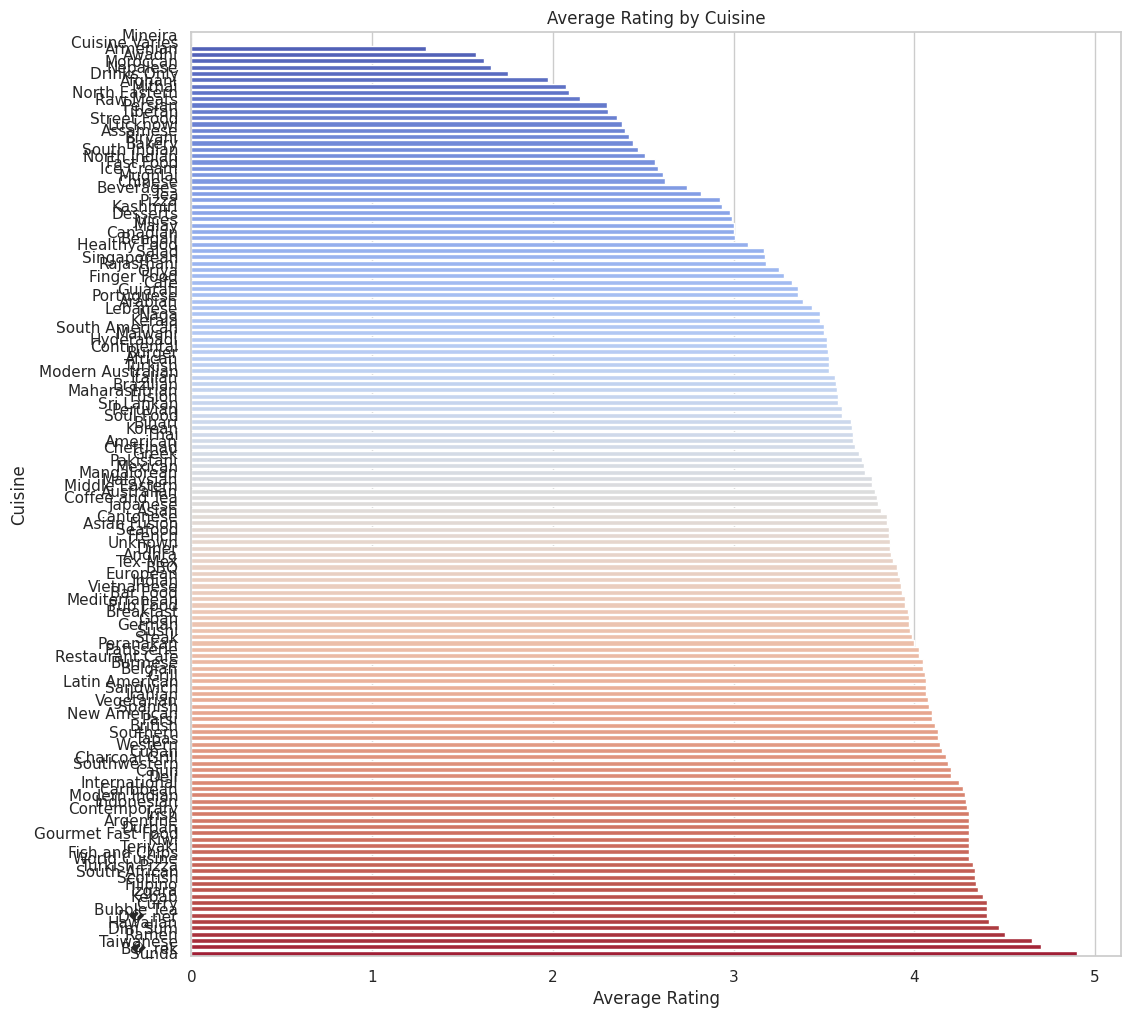

In [78]:
plt.figure(figsize=(12, 12))
sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index, palette="coolwarm")
plt.title('Average Rating by Cuisine')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

In [79]:
# Average rating by city
avg_rating_city = df.groupby('City')['Aggregate rating'].mean().sort_values()

<ipython-input-80-59f1d9438930>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_city.values, y=avg_rating_city.index, palette="coolwarm")


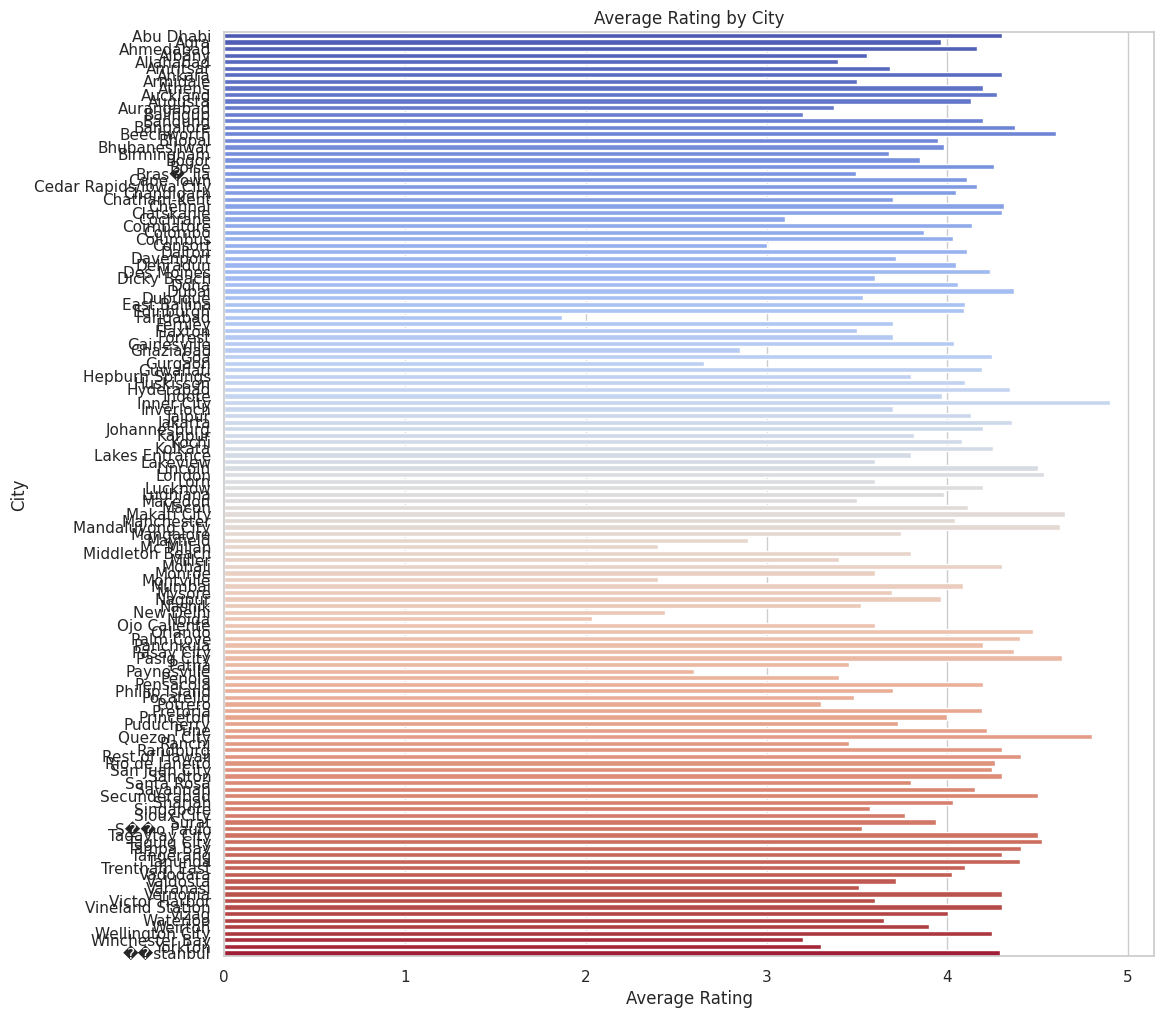

In [80]:
plt.figure(figsize=(12, 12))
sns.barplot(x=avg_rating_city.values, y=avg_rating_city.index, palette="coolwarm")
plt.title('Average Rating by City')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

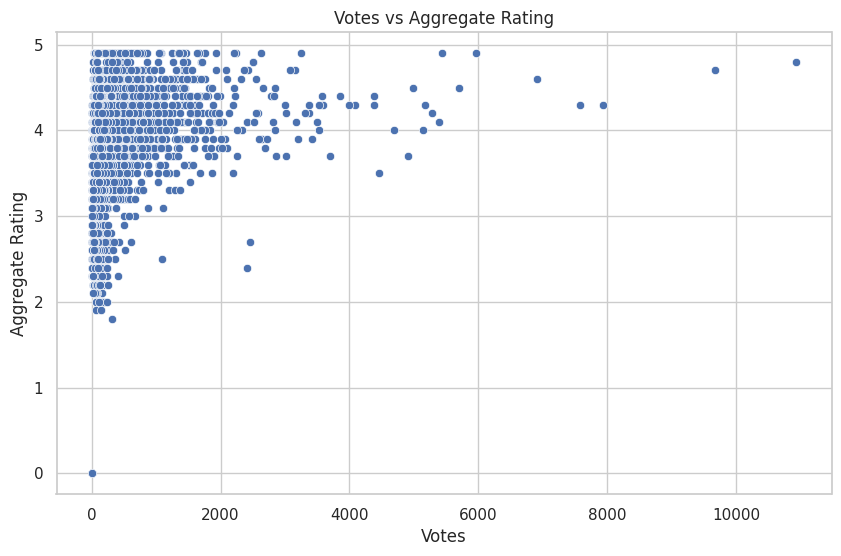

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

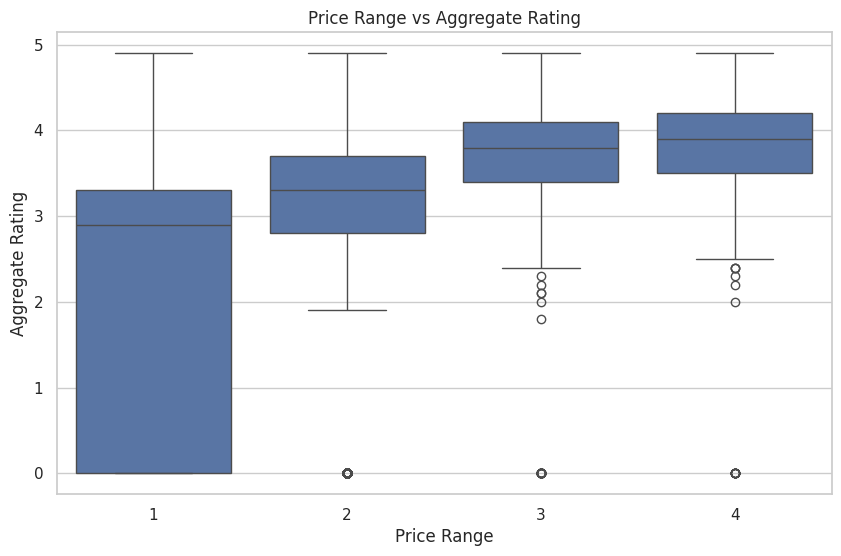

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Price Range vs Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

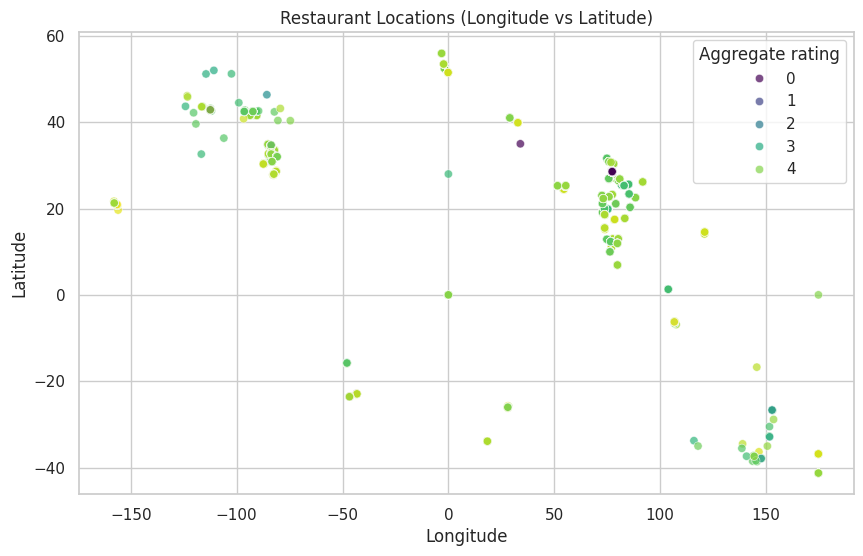

In [83]:
# Visual lat vs long
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Aggregate rating', data=df, palette="viridis", alpha=0.7)
plt.title('Restaurant Locations (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()